In [126]:
import pandas as pd
import numpy as np

In [127]:
cctv_seoul = pd.read_csv('../csv-data/cctv_seoul.csv', encoding='utf-8')

In [128]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [129]:
cctv_seoul.columns[0]

'기관명'

In [130]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [131]:
pop_seoul=pd.read_excel('../csv-data/pop_seoul.xls', 
                        header=2,
                        usecols='B,D,G,J,N',
                        encoding='utf-8')
pop_seoul

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [132]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [133]:
# cctv가 제일 많이 설치 되어있는 구, 제일 적게 설치되어 있는 구를 순서대로 정렬
cctv_seoul.sort_values('소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [134]:
cctv_seoul.sort_values('소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [135]:
cctv_seoul.sort_values('소계').tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


In [136]:
#인구수의 컬럼을 '구별','인구수','한국인','외국인','고령자'

In [137]:
#'합계'라고 되어있는 행을 삭제

In [138]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [139]:
pop_seoul.rename(columns={'자치구':'구별', '계':'인구수', '계.1':'한국인', '계.2':'외국인', '65세이상고령자':'고령자'}, inplace=True)

In [140]:
pop_seoul.drop(0, axis=0, inplace=True)

In [141]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [142]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 5 columns):
구별     25 non-null object
인구수    25 non-null float64
한국인    25 non-null float64
외국인    25 non-null float64
고령자    25 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [143]:
pop_seoul['구별']

1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
26     NaN
Name: 구별, dtype: object

In [144]:
len(pop_seoul['구별'].unique()) #중복 기입된 구가 있는지 확인

26

In [145]:
pop_seoul.iloc[25]

구별     NaN
인구수    NaN
한국인    NaN
외국인    NaN
고령자    NaN
Name: 26, dtype: object

In [146]:
pop_seoul.isnull().sum() #null값이 있는지 boolean으로 반환, 이후 합계를 구하기

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [147]:
pop_seoul['구별'].isnull().sum()

1

In [148]:
pop_seoul.drop(26, axis=0, inplace=True)
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [149]:
#외국인 비율, 고령자 비율 파생변수를 2개 만들어주세요.

In [150]:
pop_seoul['외국인 비율']=pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852


In [151]:
pop_seoul['고령자 비율']=pop_seoul['고령자']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [152]:
pop_seoul.sort_values('인구수', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


In [153]:
# 고령자 비율, 외국인 비율이 높은 구는 어다인가?
# 고령자 비율, 외국인 비율이 낮은 구는 어다인가?

In [154]:
pop_seoul.sort_values('고령자 비율', ascending=False).head(3)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


In [155]:
pop_seoul.sort_values('고령자 비율').head(3)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217


In [156]:
pop_seoul.sort_values('외국인 비율', ascending=False).head(3)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506


In [157]:
pop_seoul.sort_values('외국인 비율').head(3)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964


In [158]:
#cctv 최근 증가율이 높은 곳 / 낮은 곳

In [159]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [160]:
cctv_seoul['최근 증가율']=(cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul['2013년도 이전']*100-100

In [161]:
cctv_seoul.sort_values('최근 증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1002,464,314,211,630,148.922414
9,도봉구,485,238,159,42,386,146.638655
12,마포구,574,314,118,169,379,112.101911
8,노원구,1265,542,57,451,516,88.929889
1,강동구,773,379,99,155,377,66.490765


In [162]:
data_result=pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,50.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,66.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,25.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,34.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,49.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [163]:
data_result.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True)
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,50.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,66.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,25.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,34.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,49.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [164]:
data_result['구별'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [165]:
type(data_result['구별'].unique())

numpy.ndarray

In [166]:
# 1차원 ndarray객체는 1차원 list이므로, list처럼 다루면 된다.

In [167]:
len(data_result['구별'].unique())

25

In [168]:
# reset_index() : 현재 index로 잡혀져 있는 정수값이 df의 병합과 처리로 인해 순서대로 들어있지 않은 경우, 
#                 다시 순서대로 인덱스 값이 정렬되도록 함
#                 a_df_index=[1,2,3]  b_df_index=[1,2,3]
#                 a_df_index + b_df_index인 결과는 [1,2,3,1,2,3] 중복된 값!
#                 reset_index() 후 [0,1,2,3,4,5]
# set_index() : 특정 unique한 값을 가지는 컬럼을 index로 설정하고자 하는 경우

In [169]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,50.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,66.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,25.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,34.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,49.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [170]:
# 고령자 비율, 소계의 상관관계
np.corrcoef(data_result['고령자 비율'], data_result['소계'])
# => 고령자 비율이 높은 지역이 cctv가 많이 설치되었다라고 일반적으로 말할 수 없다.
# => 고령자 비율과 cctv 설치 수는 약간 음의 상관이 있긴 함.

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [171]:
# 외국인 비율, 소계의 상관관계
np.corrcoef(data_result['외국인 비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [172]:
# 인구수, 소계의 상관관계
np.corrcoef(data_result['인구수'], data_result['소계'])
# 인구수가 높은 지역이 소계가 높다라고 할 수 있는 여지는 30%정도이다.
# 상관도가 높지는 않다.

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [ ]:
# 고령자 비율, 외국인 비율, 인구수 3항목 중에서는 
# 인구수가 제일 cctv 설치 수 와 상관이 있는 것으로 확인됨.

In [207]:
#cctv 설치와 제일 상관있는 항목은 무엇인가요?
data_result.corr().sort_values('소계', ascending=False)['소계'].iloc[1:]

인구수       0.306342
한국인       0.304287
고령자       0.255196
외국인      -0.023786
외국인 비율   -0.136074
고령자 비율   -0.280786
최근 증가율   -0.343016
Name: 소계, dtype: float64

In [125]:
# 최근 증가율과 소계의 상관관계
np.corrcoef(data_result['최근 증가율'], data_result['소계'])

array([[ 1.      , -0.343016],
       [-0.343016,  1.      ]])

In [214]:
tot_pop=np.corrcoef(data_result['인구수'], data_result['소계'])

In [215]:
pop_seoul.duplicated().sum()

0

In [218]:
tot_list=list(tot_pop)

In [220]:
tot_list[0][1]

0.30634227936792635

In [221]:
tot_list[1]

array([0.30634228, 1.        ])

In [222]:
fst_list=[1,2,3] #1ndarray, Series, 1nd list
fst_list

[1, 2, 3]

In [223]:
fst_list[0] 

1

In [226]:
snd_list=[ #열
          [1,2,3], #행
          [4,5,6]
         ]
# df.values 행*열
# 행렬(table구조를 가지는 데이터 구조)

In [230]:
snd_list[0][0]

1

In [231]:
snd_list[1][1]

5

In [235]:
tot_corr=tot_list[0][1] #전체 인구수 상관계수

In [236]:
#세가지의 상관도를 그래프로 비교해보기

In [348]:
import seaborn as sns

In [349]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

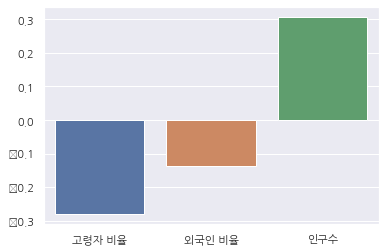

In [350]:
corr=data_result.corr()[['고령자 비율', '외국인 비율', '인구수']]
corr=corr[:1]
sns.barplot(data=corr)

In [351]:
corr=data_result.corr()[['고령자 비율', '외국인 비율', '인구수']]
corr

,고령자 비율,외국인 비율,인구수
소계,-0.280786,-0.136074,0.306342
최근 증가율,0.185089,-0.044042,-0.093068
인구수,-0.669462,-0.591939,1.000000
한국인,-0.660812,-0.637911,0.998061
외국인,-0.014055,0.838904,-0.153371
고령자,-0.380468,-0.606088,0.932667
외국인 비율,0.267348,1.000000,-0.591939
고령자 비율,1.000000,0.267348,-0.669462


In [352]:
corr[:1]

,고령자 비율,외국인 비율,인구수
소계,-0.280786,-0.136074,0.306342


In [353]:
#강남구의 한국인, 외국인, 고령자 수를 비교할 수 있게 그래프로 그려보세요.

In [354]:
corr=data_result[['한국인', '외국인', '고령자']].head(1)

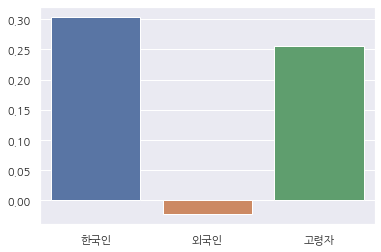

In [355]:
corr=data_result.corr()[['한국인', '외국인', '고령자']]
corr=corr[:1]
sns.barplot(data=corr)

In [356]:
#최근증가율과 소계의 상관관계

In [357]:
#heatmap, pairplot

In [358]:
corr= data_result.corr()
cols = ['소계', '최근 증가율', '인구수', '한국인', '외국인', '고령자', '외국인 비율', '고령자 비율']

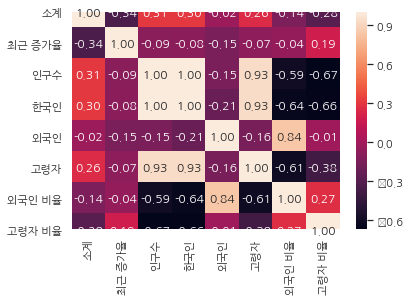

In [359]:
sns.heatmap(corr.values,
            cbar = True,
            annot= True,
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

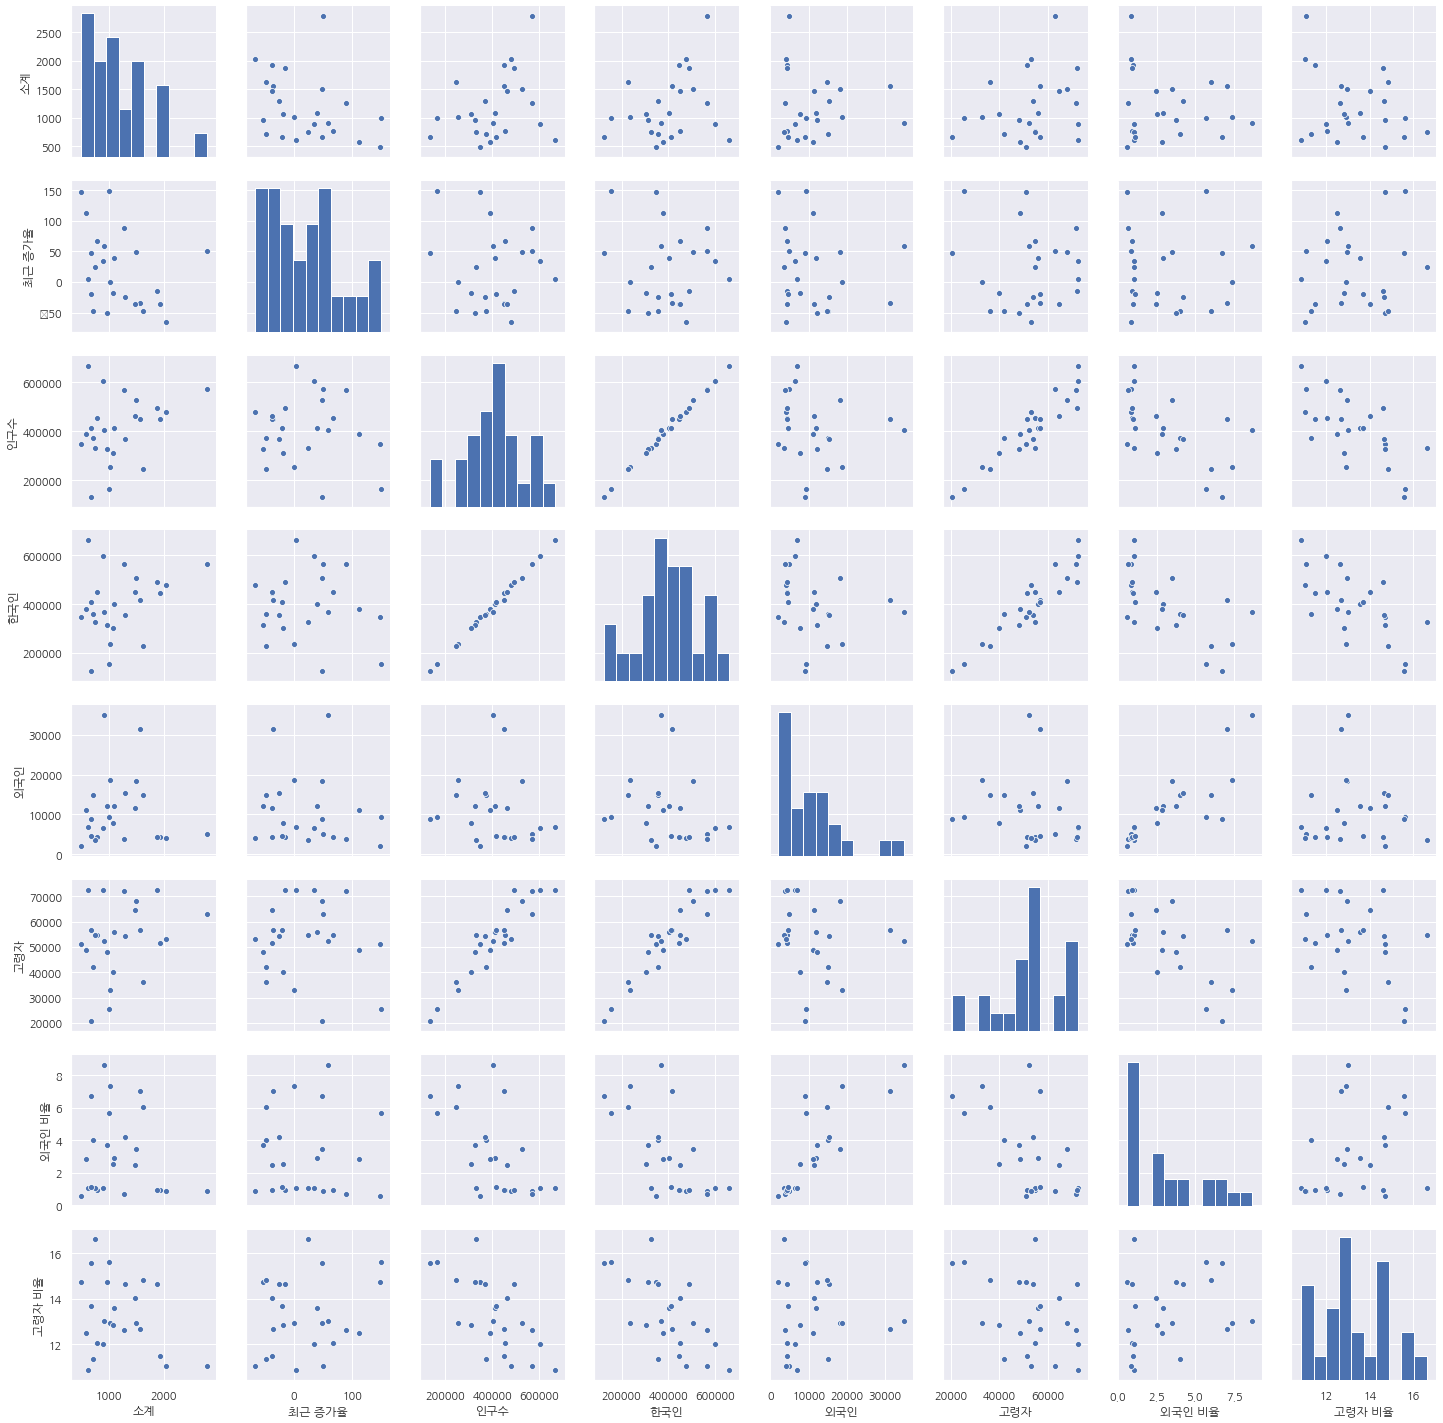

In [360]:
sns.pairplot(data_result[cols])

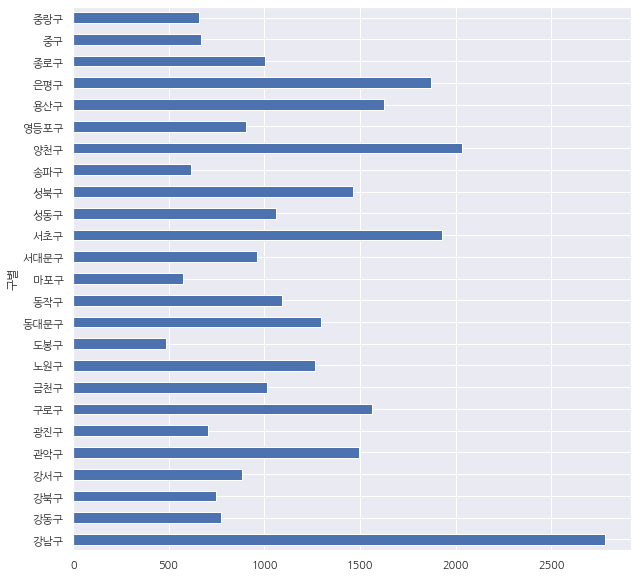

In [362]:
# 구별 소계를 그래프로 그려봅시다.!!
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))

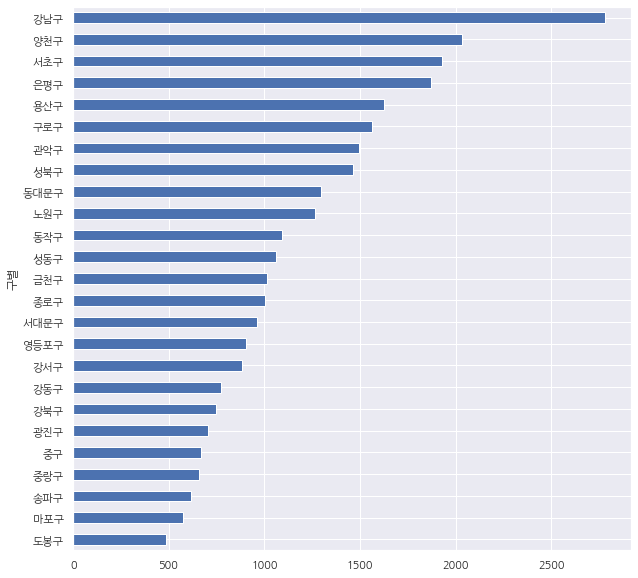

In [364]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

In [365]:
# 인구당 cctv비율을 구해서, 정렬 후, 그래프를 그려보세요!

In [376]:
cctv_per_pop=data_result['소계']/data_result['인구수']*100

In [377]:
cctv_per_pop

구별
강남구     0.487292
강동구     0.170552
강북구     0.226535
강서구     0.146413
관악구     0.284673
광진구     0.189970
구로구     0.348536
금천구     0.397911
노원구     0.222170
도봉구     0.139110
동대문구    0.350207
동작구     0.264472
마포구     0.147312
서대문구    0.294043
서초구     0.428594
성동구     0.341211
성북구     0.317391
송파구     0.092587
양천구     0.423769
영등포구    0.224326
용산구     0.665020
은평구     0.378852
종로구     0.615404
중구      0.503603
중랑구     0.159227
dtype: float64

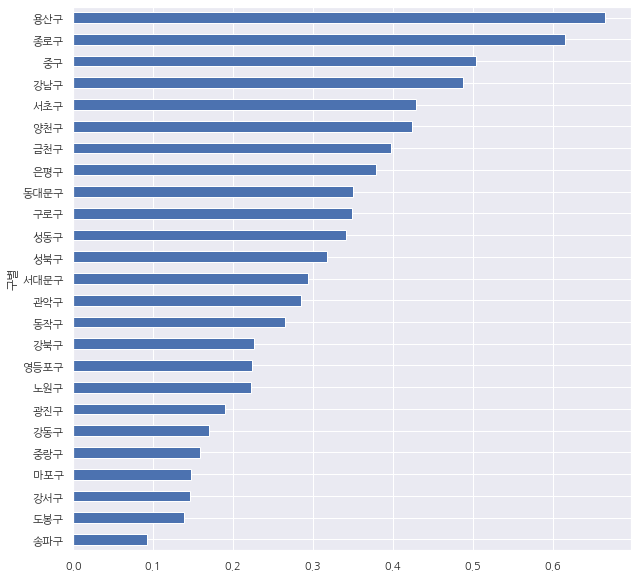

In [379]:
cctv_per_pop.sort_values().plot(kind='barh', grid=True, figsize=(10,10))

In [380]:
import matplotlib.pyplot as plt

Text(580000, 2800, 'high')

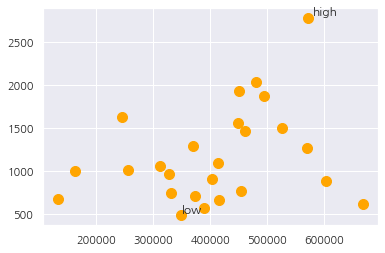

In [392]:
plt.scatter(data_result['인구수'], data_result['소계'], s=100, c='orange')
plt.text(350000,500,'low')
plt.text(580000,2800,'high')

In [396]:
## x, y축으로 사용할 데이터를 주고, 1차 방정식으로 표현했을 때
## 기울기와 y절편을 구해주세요. polyfit()
pf1=np.polyfit(data_result['인구수'], data_result['소계'], 1)
pf1

array([1.30916415e-03, 6.45066497e+02])

In [397]:
## 위에서 구한 기울기와 절편으로 함수를 만들어주세요!
f1=np.poly1d(pf1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [399]:
fx=np.linspace(100000, 700000, 100)
fx[:5]

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242])

Text(580000, 2800, 'high')

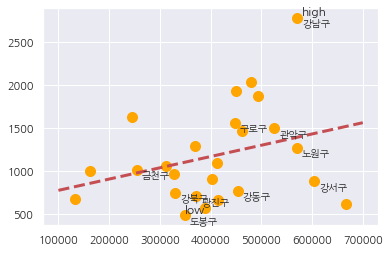

In [424]:
plt.scatter(data_result['인구수'], data_result['소계'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
plt.text(350000,500,'low')
for n in range(10):
    plt.text(data_result['인구수'][n]+10000, #글자가 쓰여질 x축 좌표
             data_result['소계'][n]-100,  #글자가 쓰여질 y축 좌표
             data_result.index[n],    #쓰여질 글자
             fontsize=10)
plt.text(580000,2800,'high')

In [425]:
# 판단선(회귀선) : 예측과 분류의 기준이 되는 선!
# 판단선은 방정식, 1차 방정식이라고 한다면 기울기와 절편이 필요!

In [427]:
# 위의 그래프는 무엇을 나타내는가?
# 현재 서울의 인구수에 따른 cctv의 구 별 설치 수

# cctv를 어느 구에 설치해야 하는가?
# => 판단선 : 인구수에 적절한 cctv수를 판단하는 선
#            판단선에 위에 위치한 구는 이미 인구수에 비해 cctv가 많이 설치된 구
#            판단선 아래에 위치한 구는 인구수에 비해 cctv 설치가 부족한 구
#            오차가 큰 순으로! 먼저 선별을 하면 될 것 같음

# 판단기준 : 인구수와 cctv와 관련있다라는 기준!

In [432]:
# 오차를 구해보자!
# 판단선의 값들이 필요 => f1[data_result['인구수']]
# 현재 값들이 필요 => f1[data_result['소계']]

100

In [434]:
f1(data_result['인구수'])

array([1391.94464487, 1238.42289235, 1077.34202601, 1435.50315451,
       1333.05189553, 1132.29026377, 1231.40708166,  979.01070661,
       1390.48361768, 1101.50134126, 1128.79741381, 1185.12289226,
       1155.18099895, 1073.3765678 , 1234.59620553, 1052.53598367,
       1248.93155299, 1518.91131175, 1273.43648757, 1172.64001207,
        964.76830981, 1292.30154299,  858.22460369,  819.4995281 ,
       1187.71896477])

In [442]:
data_result['오차']=np.abs(data_result['소계']-f1(data_result['인구수']))
data_result['오차'].sort_values(ascending=False)

구별
강남구     1388.055355
송파구      900.911312
양천구      760.563512
서초구      695.403794
용산구      659.231690
도봉구      616.501341
마포구      581.180999
은평구      580.698457
강서구      551.503155
중랑구      527.718965
강동구      465.422892
광진구      425.290264
구로구      329.592918
강북구      329.342026
영등포구     268.640012
성북구      215.068447
동대문구     165.202586
관악구      162.948104
중구       148.499528
종로구      143.775396
노원구      125.483618
서대문구     111.376568
동작구       94.122892
금천구       35.989293
성동구        9.464016
Name: 오차, dtype: float64